# Predicting profitable customer groups

_This notebook was built using Python version 3.8.1_

In this task, I will find out which customer group is worth investing in, based on a given dataset. After a quick look at a data and feature engineering process, I will build four machine learning classifier models to predict which investment (in group 1 or group 2) will be more profitable. The whole data is fully anonymised and I will use the same names of variables as given in the input file, as the application of the business domain expertise is not applicable.

## Data
Firstly, we import libraries necessary to read and check an input file:

In [1]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

Now we read the data file and display a few first rows.

In [2]:
data = pd.read_csv('data.csv')
data.head()

,g1_1,g1_2,g1_3,g1_4,g1_5,g1_6,g1_7,g1_8,g1_9,g1_10,...,c_20,c_21,c_22,c_23,c_24,c_25,c_26,c_27,c_28,target
0,4.50,1,3,4,5,1,1,4,6,0,...,-0.383704,-0.065449,0.584000,0.488000,0,-3.232000,-1.944000,-0.007944,1.76,2
1,2.20,24,22,46,10,24,28,18,22,-4,...,-0.346839,-0.159744,-0.947614,0.463540,0,-5.342174,-1.321355,0.181064,1.85,1
2,12.00,7,4,11,18,8,11,2,10,-3,...,-2.673934,-1.592303,0.525305,-0.467169,0,-6.566521,-4.176403,-0.040277,2.05,2
3,1.91,8,5,13,14,6,7,6,9,-1,...,0.616027,0.404945,-1.506923,0.741964,0,-2.438120,-0.787132,-0.012101,1.82,0
4,2.50,23,16,39,14,33,25,18,27,8,...,-1.057214,-1.159294,0.751012,-0.182052,0,-1.259728,0.059574,0.042613,1.99,2


Each row is a comparison between two customer groups.

Column names starting with “g1_”:
* contain information about the first customer group
* variables g1_1 until g1_20 were known before the campaign was run
* variable g1_21 was recorded after the campaign was run

Column names starting with “g2_”:
* contain information about the second customer group
* variables g2_1 until g2_20 were known before the campaign was run
* variable g2_21 was recorded after the campaign was run

Column names starting with “c_”:
* contain features representing some comparison of the two groups
* variables c_1 until c_27 were known before the campaign was run
* variable c_28 was recorded after the campaign was run

The target is categorical. This is what the categories mean:
* 0: none of the two groups was profitable
* 1: group 1 was the most profitable
* 2: group 2 was the most profitable

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6620 entries, 0 to 6619
Data columns (total 71 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   g1_1    6620 non-null   float64
 1   g1_2    6620 non-null   int64  
 2   g1_3    6620 non-null   int64  
 3   g1_4    6620 non-null   int64  
 4   g1_5    6620 non-null   int64  
 5   g1_6    6620 non-null   int64  
 6   g1_7    6620 non-null   int64  
 7   g1_8    6620 non-null   int64  
 8   g1_9    6620 non-null   int64  
 9   g1_10   6620 non-null   int64  
 10  g1_11   6620 non-null   int64  
 11  g1_12   6620 non-null   int64  
 12  g1_13   6620 non-null   float64
 13  g1_14   6620 non-null   float64
 14  g1_15   6620 non-null   float64
 15  g1_16   6620 non-null   float64
 16  g1_17   6620 non-null   float64
 17  g1_18   6620 non-null   float64
 18  g1_19   6620 non-null   float64
 19  g1_20   6620 non-null   float64
 20  g1_21   6620 non-null   float64
 21  g2_1    6620 non-null   float64
 22  

From the above info, one can conclude that the full dataset has 6620 rows and 71 columns. Additionally, (luckily!) there is no missing data and all values are numerical (integers or floats). We can familiarise ourselves with the data even more by checking minimal and maximal values, standard deviation, mean and percentiles for each column:

In [4]:
data.describe()

,g1_1,g1_2,g1_3,g1_4,g1_5,g1_6,g1_7,g1_8,g1_9,g1_10,...,c_20,c_21,c_22,c_23,c_24,c_25,c_26,c_27,c_28,target
count,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,...,6620.000000,6620.000000,6620.000000,6620.000000,6620.00000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000
mean,2.708779,14.424018,10.485650,24.909668,10.988066,13.412085,10.161027,10.745468,14.169033,3.251057,...,-0.029311,-0.006724,-0.004147,0.008827,0.00000,-0.228426,-0.103728,0.000408,1.917134,1.031722
std,1.857725,10.700787,8.384203,18.174948,5.635985,10.090030,7.495039,7.964247,9.866734,8.481210,...,1.220752,1.068199,0.663238,0.683422,0.32287,3.390902,1.944419,0.092761,0.302175,0.731042
min,1.050000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-27.000000,...,-4.684111,-4.319826,-2.512919,-3.118836,-2.00000,-15.202740,-9.181722,-0.750000,0.000000,0.000000
25%,1.667000,6.000000,4.000000,10.000000,6.000000,5.000000,4.000000,4.000000,6.000000,-2.000000,...,-0.716407,-0.531224,-0.440407,-0.406811,0.00000,-2.222226,-1.293471,-0.054331,1.710000,0.000000
50%,2.150000,13.000000,9.000000,22.000000,11.000000,12.000000,9.000000,9.000000,13.000000,1.000000,...,0.000000,0.000000,0.000000,0.001070,0.00000,-0.119378,-0.012487,0.000000,1.850000,1.000000
75%,2.800000,21.000000,15.000000,36.000000,16.000000,20.000000,15.000000,16.000000,21.000000,7.000000,...,0.654627,0.490504,0.410915,0.450104,0.00000,1.809334,1.035235,0.054825,2.020000,2.000000
max,23.000000,52.000000,47.000000,94.000000,20.000000,61.000000,43.000000,48.000000,52.000000,48.000000,...,4.821136,4.396281,2.987136,2.830550,2.00000,12.562698,8.209578,0.666667,4.330000,2.000000


Initial data contains 70 features plus the target (71 columns in total). That is a lot! We should reduce the number of dimensions before applying any machine learning model. By choosing the best features and removing irrelevant ones, our future model will perform better in terms of accuracy, interpretability and speed.

## Feature Selection 

We can visualise the data by plotting a distribution (histogram) for each column except the last one (target - we will focus on this one later). 

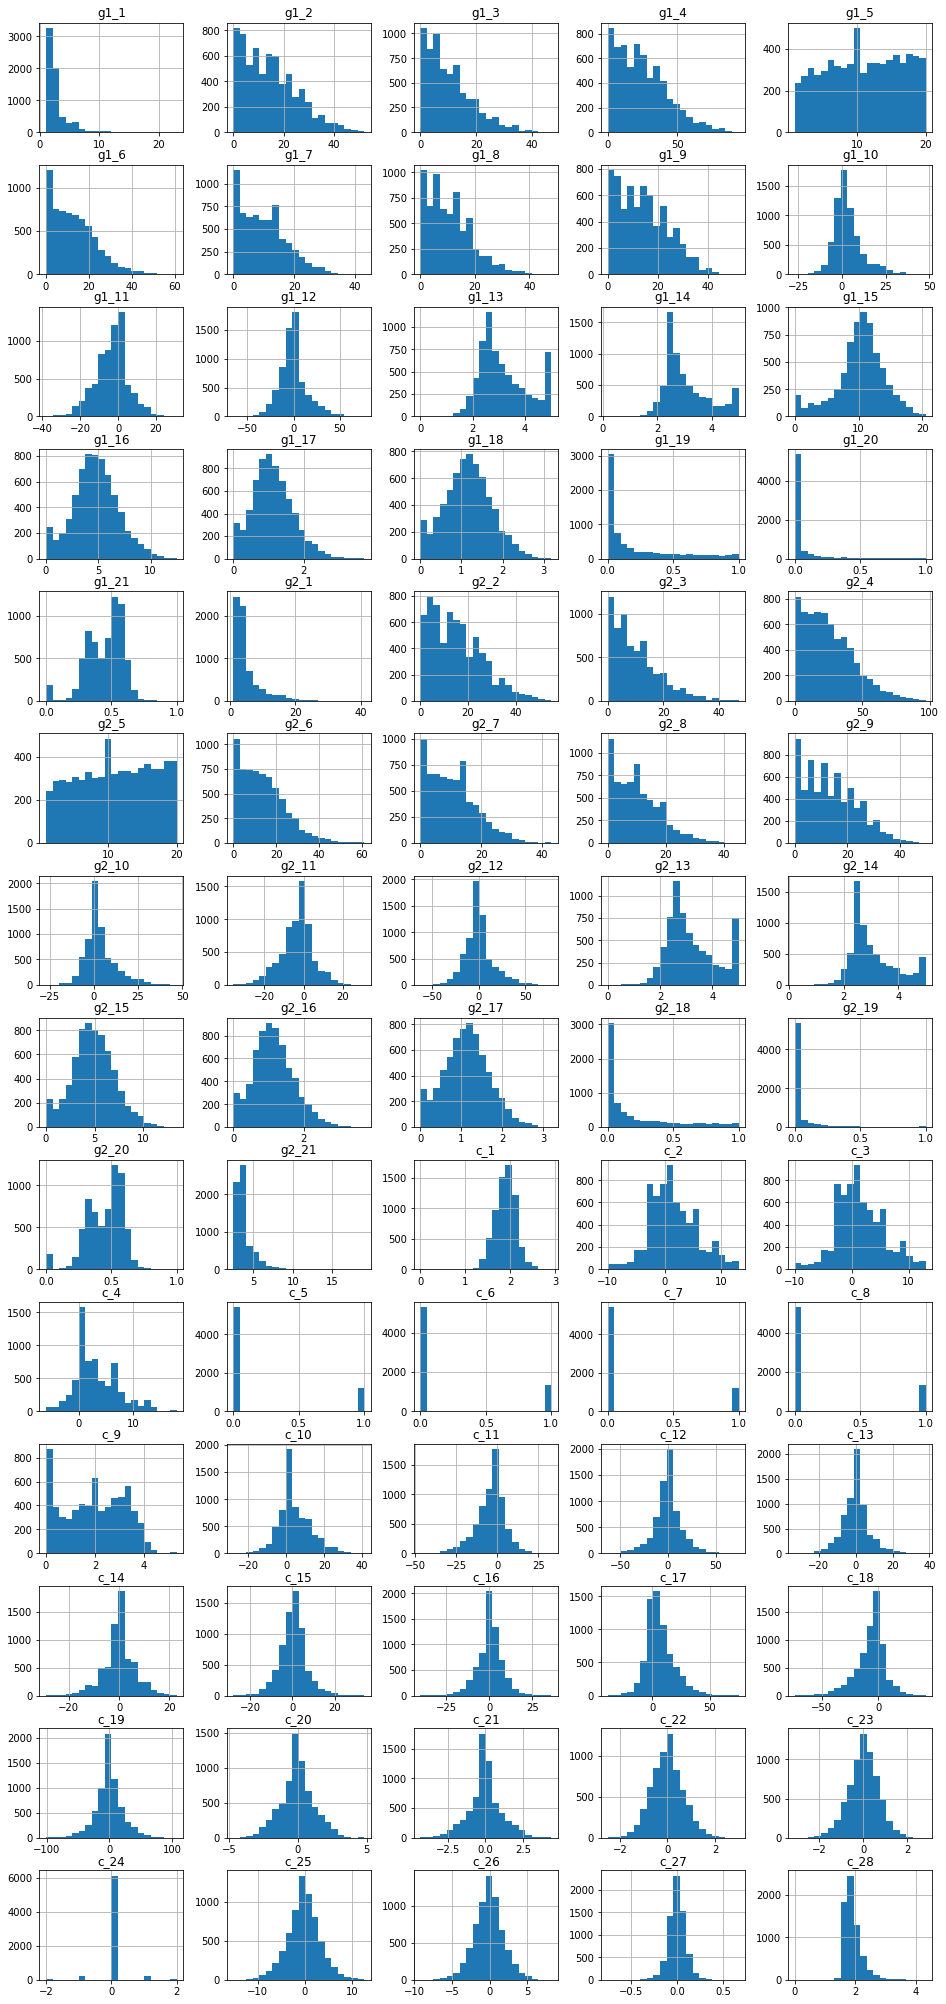

In [5]:
import matplotlib.pyplot as plt

X_df = data.drop(['target'],axis = 1)
y_df = (data['target'])

# Prepare canvas
fig, axs = plt.subplots(nrows = 14, ncols = 5, figsize = (16, 36))

# Plot histograms
X_df.hist(ax = axs, bins = 20)
plt.show()

Similarly, we can visualise the target y. As y values are quantised, we can simply count each value.

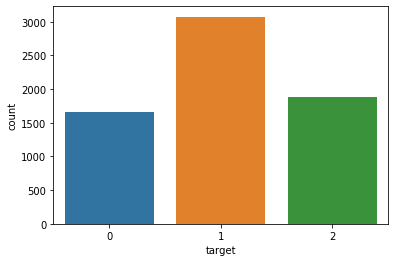

In [6]:
import seaborn as sns
sns.countplot(y_df)

One can note that class 1 is the largest group among the given data set. This means that group 1 was the most profitable in most of the cases. We can visualise the above plot in terms of the percentage of successful campaigns.

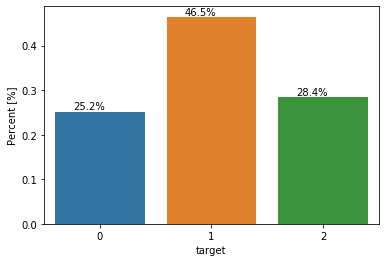

In [7]:
ax = sns.barplot(x = 'target', y = 'target', data = data, estimator = lambda x: len(x) / len(data))
ax.set(ylabel = 'Percent [%]')
for p in ax.patches:
    ax.annotate("{:.1%}".format(p.get_height()), (p.get_x()+0.3, p.get_height()), ha = 'center', va = 'bottom', color= 'black')


We can summarise the above plot:

* in 25.2% of campaigns, none of the two groups was profitable  
* 46.5% of campaigns led to group 1 being the most profitable
* 28.4% of campaigns led to group 2 being the most profitable

It is also worth noting that the three classes are not equally distributed: we have more records in class 1 than in classes 0 and 2. This may lead to imbalanced classification while performing machine learning models and result in worse accuracy of prediction. Here I will keep the number of targets as they are, however, in the case of deeper analysis, one can consider balancing the target data.

### Variance threshold
The first method for the feature selection that we will apply is variance thresholding. This method drops features with mostly the same values or with a very low variation. Such features make the model hard to learn and perform well. As there is no one good value of the variance threshold to put, we will test a few possibilities.

In [8]:
from sklearn.feature_selection import VarianceThreshold

def varth(threshold):
    var_threshold = VarianceThreshold(threshold = threshold)
    var_threshold.fit(X_df)
    sum(var_threshold.get_support()) 
    th_columns = [column for column in X_df.columns if column not in X_df.columns[var_threshold.get_support()]]
    return th_columns

for th in [0.0, 0.1, 0.5, 1.0]:   
    cols = varth(th)
    print('Columns below variance threshold = ' + str(th) + ' : \n' + str(cols))

Columns below variance threshold = 0.0 : 
[]
Columns below variance threshold = 0.1 : 
['g1_19', 'g1_20', 'g1_21', 'g2_18', 'g2_19', 'g2_20', 'c_1', 'c_27', 'c_28']
Columns below variance threshold = 0.5 : 
['g1_17', 'g1_18', 'g1_19', 'g1_20', 'g1_21', 'g2_16', 'g2_17', 'g2_18', 'g2_19', 'g2_20', 'c_1', 'c_5', 'c_6', 'c_7', 'c_8', 'c_22', 'c_23', 'c_24', 'c_27', 'c_28']
Columns below variance threshold = 1.0 : 
['g1_13', 'g1_14', 'g1_17', 'g1_18', 'g1_19', 'g1_20', 'g1_21', 'g2_13', 'g2_14', 'g2_16', 'g2_17', 'g2_18', 'g2_19', 'g2_20', 'c_1', 'c_5', 'c_6', 'c_7', 'c_8', 'c_22', 'c_23', 'c_24', 'c_27', 'c_28']


We can notice that depending on the variance threshold, a different number of columns is reported. Here we can make a conservative decision to use threshold = 0.0. It means that we cannot drop any features so far.



### Pairwise correlation between features
We can also print and plot the correlation matrix for the X data.

In [9]:
corr_df = data.corr().abs()
corr_df

,g1_1,g1_2,g1_3,g1_4,g1_5,g1_6,g1_7,g1_8,g1_9,g1_10,...,c_20,c_21,c_22,c_23,c_24,c_25,c_26,c_27,c_28,target
g1_1,1.000000,0.164910,0.224802,0.200795,0.343122,0.161452,0.142321,0.187718,0.137807,0.317850,...,0.647745,0.623716,0.031244,0.206267,0.140807,0.531982,0.528387,0.226197,0.039719,0.232350
g1_2,0.164910,1.000000,0.811029,0.962898,0.447685,0.942299,0.481965,0.832117,0.589023,0.695123,...,0.290130,0.293806,0.213392,0.180104,0.053655,0.161989,0.162297,0.060257,0.188993,0.042702
g1_3,0.224802,0.811029,1.000000,0.938811,0.546881,0.801764,0.409913,0.916102,0.359642,0.591603,...,0.401097,0.404894,0.273959,0.232708,0.066917,0.241096,0.245965,0.095251,0.260013,0.062412
g1_4,0.200795,0.962898,0.938811,1.000000,0.515861,0.924652,0.472860,0.912525,0.512701,0.682174,...,0.355847,0.359763,0.252017,0.213389,0.062459,0.206593,0.209020,0.079417,0.231218,0.053932
g1_5,0.343122,0.447685,0.546881,0.515861,1.000000,0.389234,0.291838,0.427415,0.257780,0.720973,...,0.602242,0.583982,0.432377,0.385178,0.100876,0.331556,0.343214,0.148368,0.333108,0.087913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c_25,0.531982,0.161989,0.241096,0.206593,0.331556,0.182733,0.123786,0.219554,0.135183,0.326788,...,0.558384,0.541635,0.145867,0.151823,0.107238,1.000000,0.883036,0.151220,0.212511,0.147813
c_26,0.528387,0.162297,0.245965,0.209020,0.343214,0.189968,0.119060,0.227645,0.133256,0.331220,...,0.576090,0.543012,0.178698,0.190888,0.119079,0.883036,1.000000,0.517123,0.204904,0.149233
c_27,0.226197,0.060257,0.095251,0.079417,0.148368,0.081674,0.033601,0.102488,0.039854,0.126861,...,0.236609,0.192345,0.133660,0.146864,0.046962,0.151220,0.517123,1.000000,0.075477,0.062142
c_28,0.039719,0.188993,0.260013,0.231218,0.333108,0.275988,0.031042,0.302612,0.034080,0.355773,...,0.255449,0.246087,0.253444,0.185535,0.057389,0.212511,0.204904,0.075477,1.000000,0.021353


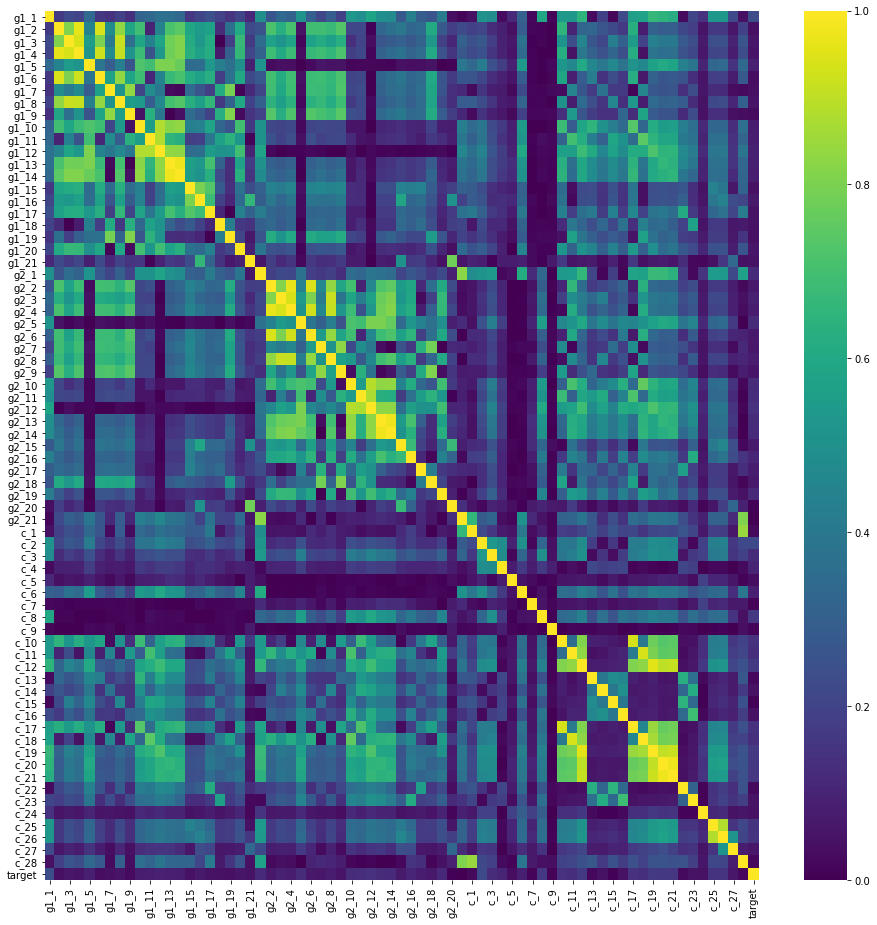

In [10]:
figure, ax_hm = plt.subplots(nrows = 1, ncols = 1, figsize = (16, 16))
sns.heatmap(corr_df, cmap = 'viridis', ax = ax_hm)
plt.show()

When variables are (highly) correlated with each other they can be considered redundant ones, as they do not add any new information to the output. In consequence, they can be dropped without losing a bigger picture of the input data.

Here we will print columns with a correlation higher than 0.8. As the correlation matrix is symmetrical, we can consider only the upper triangle (above the main diagonal) to make the analysis more robust. We keep only variables without high correlations, reducing the number of columns from 70 to 42.

In [11]:
upper_triangle = corr_df.where(np.triu(np.ones(corr_df.shape), k = 1).astype(np.bool))
high_corr = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.8)]
print('Columns with high correlation (> 0.8): \n' + str(high_corr))

data = data.drop(high_corr, axis=1)
display(data)

Columns with high correlation (> 0.8): 
['g1_3', 'g1_4', 'g1_6', 'g1_8', 'g1_9', 'g1_12', 'g1_13', 'g1_14', 'g1_16', 'g1_19', 'g2_3', 'g2_4', 'g2_6', 'g2_8', 'g2_9', 'g2_12', 'g2_13', 'g2_14', 'g2_18', 'g2_21', 'c_12', 'c_17', 'c_18', 'c_19', 'c_20', 'c_21', 'c_26', 'c_28']


,g1_1,g1_2,g1_5,g1_7,g1_10,g1_11,g1_15,g1_17,g1_18,g1_20,...,c_13,c_14,c_15,c_16,c_22,c_23,c_24,c_25,c_27,target
0,4.50,1,5,1,0,-2,6.240000,0.744000,1.216000,0.003028,...,0,1,4,2,0.584000,0.488000,0,-3.232000,-0.007944,2
1,2.20,24,10,28,-4,-4,7.423435,0.836178,1.975244,0.019448,...,0,12,2,-3,-0.947614,0.463540,0,-5.342174,0.181064,1
2,12.00,7,18,11,-3,-8,11.091399,0.730046,2.022004,0.014264,...,7,-5,-1,-3,0.525305,-0.467169,0,-6.566521,-0.040277,2
3,1.91,8,14,7,-1,-3,9.864426,0.656638,1.407549,0.021386,...,-10,0,-3,4,-1.506923,0.741964,0,-2.438120,-0.012101,0
4,2.50,23,14,25,8,-9,11.672962,1.895740,1.237122,0.000062,...,10,4,-4,-4,0.751012,-0.182052,0,-1.259728,0.042613,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6615,1.30,3,1,0,2,5,8.128000,1.904000,0.728000,0.003089,...,1,-2,9,0,1.776000,-0.288000,0,2.888000,-0.114780,1
6616,1.85,19,6,9,6,1,12.445367,1.275865,1.215939,0.064248,...,3,4,-1,1,-0.465596,0.454124,0,-1.204408,-0.002936,0
6617,2.50,5,19,8,-5,2,12.735732,1.018920,1.422971,0.007597,...,-6,-4,0,3,-0.051984,0.050770,0,1.743444,0.019195,1
6618,1.80,5,10,3,1,-1,11.668416,0.721472,0.597312,0.004967,...,-1,0,-2,0,-0.567168,-0.163008,0,1.959168,0.071180,1


### Correlation between features and target

If a variable has a very low correlation with the target, it’s not going to be useful for the model (prediction). Contrary to the pairwise correlation, where we removed highly-correlated features, here we can drop variables that have a very low correlation with the target. To do it, we need to again calculate the correlation matrix of the newly created (reduced) dataframe and then check the correlation with respect to the target column.

In [12]:
new_corr = data.corr() 
cor_target = abs(new_corr['target']) 
display(cor_target)

g1_1      0.232350
g1_2      0.042702
g1_5      0.087913
g1_7      0.040207
g1_10     0.075361
g1_11     0.084008
g1_15     0.045671
g1_17     0.049804
g1_18     0.044980
g1_20     0.058573
g1_21     0.047823
g2_1      0.120207
g2_2      0.063144
g2_5      0.121887
g2_7      0.059240
g2_10     0.124691
g2_11     0.129837
g2_15     0.068045
g2_16     0.102084
g2_17     0.081947
g2_19     0.111277
g2_20     0.006479
c_1       0.025124
c_2       0.219371
c_3       0.123755
c_4       0.098819
c_5       0.031259
c_6       0.089838
c_7       0.011434
c_8       0.162362
c_9       0.009198
c_10      0.142526
c_11      0.132787
c_13      0.021272
c_14      0.044117
c_15      0.003928
c_16      0.046536
c_22      0.024715
c_23      0.050587
c_24      0.045446
c_25      0.147813
c_27      0.062142
target    1.000000
Name: target, dtype: float64

We can notice that many remaining variables have a small correlation with the target. We can drop variables with a correlation smaller than 0.01.

In [13]:
small_corr = cor_target[(cor_target) < 0.01] 
display(small_corr.index) 
data = data.drop(small_corr.index, axis = 1)
display(data) 

Index(['g2_20', 'c_9', 'c_15'], dtype='object')

,g1_1,g1_2,g1_5,g1_7,g1_10,g1_11,g1_15,g1_17,g1_18,g1_20,...,c_11,c_13,c_14,c_16,c_22,c_23,c_24,c_25,c_27,target
0,4.50,1,5,1,0,-2,6.240000,0.744000,1.216000,0.003028,...,-3,0,1,2,0.584000,0.488000,0,-3.232000,-0.007944,2
1,2.20,24,10,28,-4,-4,7.423435,0.836178,1.975244,0.019448,...,-12,0,12,-3,-0.947614,0.463540,0,-5.342174,0.181064,1
2,12.00,7,18,11,-3,-8,11.091399,0.730046,2.022004,0.014264,...,-7,7,-5,-3,0.525305,-0.467169,0,-6.566521,-0.040277,2
3,1.91,8,14,7,-1,-3,9.864426,0.656638,1.407549,0.021386,...,0,-10,0,4,-1.506923,0.741964,0,-2.438120,-0.012101,0
4,2.50,23,14,25,8,-9,11.672962,1.895740,1.237122,0.000062,...,-13,10,4,-4,0.751012,-0.182052,0,-1.259728,0.042613,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6615,1.30,3,1,0,2,5,8.128000,1.904000,0.728000,0.003089,...,0,1,-2,0,1.776000,-0.288000,0,2.888000,-0.114780,1
6616,1.85,19,6,9,6,1,12.445367,1.275865,1.215939,0.064248,...,3,3,4,1,-0.465596,0.454124,0,-1.204408,-0.002936,0
6617,2.50,5,19,8,-5,2,12.735732,1.018920,1.422971,0.007597,...,2,-6,-4,3,-0.051984,0.050770,0,1.743444,0.019195,1
6618,1.80,5,10,3,1,-1,11.668416,0.721472,0.597312,0.004967,...,2,-1,0,0,-0.567168,-0.163008,0,1.959168,0.071180,1


Here, with the very minimalistic selection (threshold was only 0.01), we reduced our dimensions by the next three.

### Mutual information
Mutual information measures the dependency between the variables. In other words, it measures the reduction in uncertainty for one variable given a known value of the other variable.

In [14]:
from sklearn.feature_selection import mutual_info_classif
X = data.drop(['target'], axis = 1)
Y = data['target']
mutual_info = mutual_info_classif(X, Y)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)
mutual_info

g1_1     0.102153
g1_2     0.013191
g1_5     0.027626
g1_7     0.002276
g1_10    0.024680
g1_11    0.038443
g1_15    0.011887
g1_17    0.016472
g1_18    0.011836
g1_20    0.019313
g1_21    0.022947
g2_1     0.107509
g2_2     0.014087
g2_5     0.024944
g2_7     0.010487
g2_10    0.033230
g2_11    0.036330
g2_15    0.006787
g2_16    0.028169
g2_17    0.018652
g2_19    0.027748
c_1      0.017872
c_2      0.143274
c_3      0.034156
c_4      0.032373
c_5      0.000000
c_6      0.025540
c_7      0.000000
c_8      0.023155
c_10     0.053763
c_11     0.041194
c_13     0.000000
c_14     0.000493
c_16     0.002781
c_22     0.000000
c_23     0.000000
c_24     0.016661
c_25     0.048306
c_27     0.004885
dtype: float64

Now we can select features according to the K-best scores. As we do not want too many features to be put into our model, we limit ourselves to the 10 best features (this will be justified in the next section). For more details please check [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest) Sklearn documentation.

In [15]:
from sklearn.feature_selection import SelectKBest
sel_cols = SelectKBest(mutual_info_classif, k = 10)
sel_cols.fit(X, Y)
cols = X.columns[sel_cols.get_support()]
X = X[cols]
display(X)

,g1_1,g2_1,g2_11,g2_19,c_2,c_3,c_8,c_10,c_11,c_25
0,4.50,1.83,-1,0.002953,-1,7,1,1,-3,-3.232000
1,2.20,2.80,-8,0.033373,2,1,0,10,-12,-5.342174
2,12.00,1.30,15,0.042004,-5,10,1,-11,-7,-6.566521
3,1.91,4.50,-9,0.010358,-1,3,0,5,0,-2.438120
4,2.50,3.00,-2,0.008148,-3,2,0,0,-13,-1.259728
...,...,...,...,...,...,...,...,...,...,...
6615,1.30,12.00,1,0.002953,6,-2,0,0,0,2.888000
6616,1.85,4.50,-7,0.002953,2,-1,0,11,3,-1.204408
6617,2.50,2.88,3,0.021068,-2,4,0,-8,2,1.743444
6618,1.80,5.25,-2,0.004472,0,2,0,2,2,1.959168


Our final columns contain two g1_ columns, two g2_ columns and six c_ columns. Finally, we reduced our 70-dimension data to 10-dimension one!

## Models

### Train and test data

Train-test split is a model validation process that allows for simulation of how the model would perform with new data. We will take 80% of the data as a training set and the rest 20% as test data.

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Data normalisation
We have a couple of alternatives to scale our data before we start model implementation. All of them have advantages and disadvantages. Two commonly used normalisations are summarised below:

* Min-max: guarantees all features will have the same scale but does not handle outliers well
* Z-score: handles outliers, but does not produce normalized data with the same scale.

As our features have different orders of magnitudes, we will use min-max normalisation.

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Support vector machines

There is a plethora of possible machine-learning models that can be used to solve our problem. Here we will check a few of them, broadly used in the data science sector.

The first model that we will try is a support vector machines (SVM). This is a linear model which means that the classification decision is based on the value of a linear combination of the characteristics.

It is a good practice to start with the simple (linear) models before diving into more complex (non-linear) ones, as simplicity naturally results in faster computations and easier interpretation of the output.

Let us implement the SVM classifier and fit it to our dataset:

In [18]:
from sklearn.svm import LinearSVC
svm_classifier = LinearSVC()
svm_classifier.fit(X_train, y_train)
svm_score = svm_classifier.score(X_test, y_test)
print('Test accuracy: ', svm_score)

Test accuracy:  0.5725075528700906


Now we can make predictions based on the SVM model and compare the result with the test data:

In [19]:
from sklearn.metrics import accuracy_score
y_pred = svm_classifier.predict(X_test)
print('Test accuracy: ', accuracy_score(y_test, y_pred))

Test accuracy:  0.5725075528700906


We reached an accuracy of 57%, which is quite a good score for the first try.

To take a deeper look at the model performance we will plot a confusion matrix:

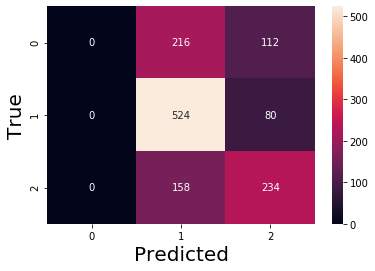

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
#cm

# Plot confusion matrix
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax, fmt = 'g')
ax.set_xlabel('Predicted', fontsize = 20)

ax.set_ylabel('True', fontsize = 20)
plt.show()

We can see that the model has a problem identifying class 0 and confuses this class with other classes. Although the overall accuracy is relatively high, from the confusion matrix we can learn that the model skips one class in classification.

The next models will be non-linear ones to check if we can perform any better than SVM with the more complex approach.

### Ada Boost Classifier

Now we try the [Ada Boost Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html). We also check the hyperparameters of the Ada Classifier to find the most suitable ones.

Due to the (very) limited computational resources, I tested very few possible hyperparameters - with access to the more powerful computational infrastructure I would be able to test a broader grid of these parameters and (possibly) find better ones. However, for now, the broader grid requires much more time, so I will keep it as small as possible.

In [21]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

DT_classifier = DecisionTreeClassifier(random_state = 42)
Ada_classifier = AdaBoostClassifier(base_estimator = DT_classifier)

# This line prints dictionary of parameters that can be used in hypertuning
print(Ada_classifier.get_params().keys())

parameters = {'base_estimator__criterion' : ['gini'], #['gini', 'entropy'],
              'base_estimator__max_depth' : [5], #[2, 5, 10],
              'base_estimator__min_samples_leaf' : [10], #[5, 10],
#              'base_estimator__splitter'  : ['best', 'random'],
              'learning_rate'             : [0.1], #[0.01, 0.05, 0.1],
              'algorithm'                 : ['SAMME'], #['SAMME', 'SAMME.R'],
              'n_estimators'              : [10], #[10, 20, 30],
}

Ada_classifier = GridSearchCV(Ada_classifier, parameters, cv = 5, scoring = 'accuracy')
Ada_classifier.fit(X_train, y_train)
print(f'Best parameters: {Ada_classifier.best_params_}')
print(f'Accuracy score of the best_estimator: ' + f'{Ada_classifier.best_score_:.3f}')

dict_keys(['algorithm', 'base_estimator__ccp_alpha', 'base_estimator__class_weight', 'base_estimator__criterion', 'base_estimator__max_depth', 'base_estimator__max_features', 'base_estimator__max_leaf_nodes', 'base_estimator__min_impurity_decrease', 'base_estimator__min_impurity_split', 'base_estimator__min_samples_leaf', 'base_estimator__min_samples_split', 'base_estimator__min_weight_fraction_leaf', 'base_estimator__presort', 'base_estimator__random_state', 'base_estimator__splitter', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])
Best parameters: {'algorithm': 'SAMME', 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 5, 'base_estimator__min_samples_leaf': 10, 'learning_rate': 0.1, 'n_estimators': 10}
Accuracy score of the best_estimator: 0.593


I compared the difference between k = 10 and k = 20 in SelectKBest, so how dimensionality of the data influence performance of the Ada Classifier:

* K = 10: best parameters: {'algorithm': 'SAMME.R', 'base_estimator__criterion': 'entropy', 'learning_rate': 0.05, 'n_estimators': 20}, accuracy: 0.469
* K = 20: best parameters: {'algorithm': 'SAMME.R', 'base_estimator__criterion': 'entropy', 'learning_rate': 0.05, 'n_estimators': 20}, accuracy: 0.478

We can notice that more complex data (k = 20) lead to an increase in the model accuracy. Nonetheless, this improvement is not significant and the computation time is longer. This is why k = 10 is a good compromise.

After a few attempts and checks of different parameters values, I found the best parameters:

* Best parameters: {'algorithm': 'SAMME', 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 5, 'base_estimator__min_samples_leaf': 10, 'learning_rate': 0.1, 'n_estimators': 10}; Accuracy score of the best_estimator: 0.595

With these hyperparameters one can achieve an accuracy of almost 60%.

In [22]:
best_DT_classifier = DecisionTreeClassifier(random_state = 42, criterion = 'gini', max_depth = 5, min_samples_leaf = 10)
best_Ada_classifier = AdaBoostClassifier(base_estimator = DT_classifier, algorithm = 'SAMME', learning_rate = 0.1, n_estimators = 10)

Now we can evaluate our best model on the test dataset.

In [23]:
best_Ada_classifier.fit(X_train, y_train)

# Make predictions
y_pred = best_Ada_classifier.predict(X_test)
print('Test accuracy: ', accuracy_score(y_test, y_pred))

Test accuracy:  0.44486404833836857


And illustrate the result with the confusion matrix:

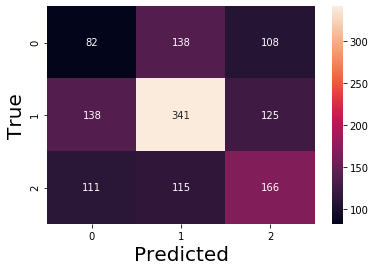

In [24]:
cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
#cm

# Plot confusion matrix
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax, fmt = 'g')
ax.set_xlabel('Predicted', fontsize = 20)

ax.set_ylabel('True', fontsize = 20)
plt.show()

We can also plot feature importances for all variables:

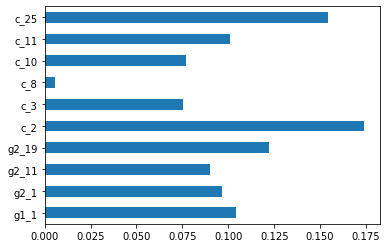

In [25]:
(pd.Series(best_Ada_classifier.feature_importances_, index = X.columns).plot(kind='barh'))

It looks that columns c_25 and c_2 play a dominant role in classification with Ada Boost, while column c_8 seems to be insignificant. Maybe after a deeper investigation we can skip column c_8 and perform Ada Classifier on only 9 variables without losing accuracy? I address this question in the future analysis.

### Gradient Boosting Classifier
Another classifier algorithm that we will perform is [Gradient Boosting Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html). Again, we will check several possible hyperparameters to find the best ones.

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
GB_classifier = GradientBoostingClassifier()
print(GB_classifier.get_params().keys())

parameters = {'criterion' : ['friedman_mse'], #['friedman_mse', 'squared_error'],
              'learning_rate' : [0.05], #[0.01, 0.05, 0.1],
              'max_depth' : [2], #[2, 5, 10],
              'subsample' : [1.0], #[0.25, 0.5, 0.75, 1.0],
              'max_features' : ['auto'], #['auto', 'sqrt', 'log2'],
              'n_estimators' : [40], #[10, 20, 30, 40, 50],
              'random_state' : [42],
}
GB_classifier = GridSearchCV(GB_classifier, parameters, cv = 5, scoring = 'accuracy')
GB_classifier.fit(X_train, y_train)
print(f'Best parameters: {GB_classifier.best_params_}')
print(f'Accuracy score of the best_estimator: ' + f'{GB_classifier.best_score_:.3f}')

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])
Best parameters: {'criterion': 'friedman_mse', 'learning_rate': 0.05, 'max_depth': 2, 'max_features': 'auto', 'n_estimators': 40, 'random_state': 42, 'subsample': 1.0}
Accuracy score of the best_estimator: 0.592


After a couple of runs of testing, I found the best parameters:

* Best parameters: {'criterion': 'friedman_mse', 'learning_rate': 0.05, 'max_depth': 2, 'max_features': 'auto', 'n_estimators': 40, 'random_state': 42, 'subsample': 1.0}; Accuracy score of the best_estimator: 0.594

So far, the performances of Ada Boost and Gradient Boost are comparable.

In [27]:
best_GB_classifier = GradientBoostingClassifier(criterion = 'friedman_mse', learning_rate = 0.05, max_depth = 2, max_features = 'auto', n_estimators = 40, random_state = 42, subsample = 1.0)

Again, we can evaluate the Gradient Boosting model on the test dataset.

In [28]:
best_GB_classifier.fit(X_train, y_train)

# Make predictions
y_pred = best_GB_classifier.predict(X_test)
print('Test accuracy: ', accuracy_score(y_test, y_pred))

Test accuracy:  0.5981873111782477


Here test accuracy is better (60%) than for the Ada Classifier (44%). Let us plot a confusion matrix:

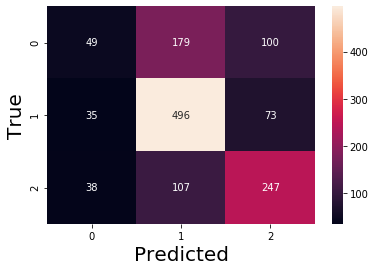

In [29]:
cm = confusion_matrix(y_true = y_test, y_pred = y_pred)

# Plot confusion matrix
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax, fmt = 'g')
ax.set_xlabel('Predicted', fontsize = 20)

ax.set_ylabel('True', fontsize = 20)
plt.show()

We can see that the Gradient Boost performs better than Ada Boost. However, in both cases, class '0' is the hardest one to correctly classify for both algorithms. Let us also check feature importances:

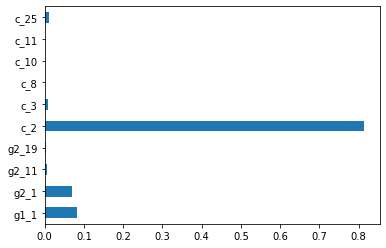

In [30]:
(pd.Series(best_GB_classifier.feature_importances_, index = X.columns).plot(kind='barh'))

Here we can observe that c_2 is an extremely dominant variable among the others. This requires deeper investigation, as the natural question that arises here is: why use all 10 features if the algorithm cares only about one of them? Maybe different rules during the feature engineering would improve this situation. However, due to the limited time, I will not here consider other options for the Gradient Boost Classifier.

### Simple neural network

Here we will build a very simple (feedforward) neural network. I empirically checked several numbers of filters in layers, as well as the numbers of epochs in model training. I chose minimal values that give satisfying results. In the end, this piece of code produces a schematic graph of the network architecture.

In [31]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

# Hyperparameters
num_lay1 = 8          # Number of filters in the first layer
num_hidden = num_lay1*2 # Number of units in the hidden layer
num_layout = 3          # Number of neurons in the output layer
num_epochs = 50

# Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_lay1, activation = 'relu'),
    tf.keras.layers.Dense(num_hidden, activation = 'relu'),
    tf.keras.layers.Dense(num_layout, activation = 'sigmoid')
])

# Compile the model
model.compile(optimizer = tf.keras.optimizers.Adam(0.1), 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics = ['accuracy'])

# Train the model
history = model.fit(x = X_train, y = y_train, epochs = num_epochs) 

Epoch 1/50
166/166 [==============================] - 1s 987us/step - loss: 0.9739 - accuracy: 0.5402
Epoch 2/50
166/166 [==============================] - 0s 1ms/step - loss: 0.9515 - accuracy: 0.5627
Epoch 3/50
166/166 [==============================] - 0s 965us/step - loss: 0.9488 - accuracy: 0.5614
Epoch 4/50
166/166 [==============================] - 0s 950us/step - loss: 0.9406 - accuracy: 0.5678
Epoch 5/50
166/166 [==============================] - 0s 970us/step - loss: 0.9535 - accuracy: 0.5663
Epoch 6/50
166/166 [==============================] - 0s 990us/step - loss: 0.9412 - accuracy: 0.5687
Epoch 7/50
166/166 [==============================] - 0s 1ms/step - loss: 0.9592 - accuracy: 0.5559
Epoch 8/50
166/166 [==============================] - 0s 1ms/step - loss: 0.9561 - accuracy: 0.5578
Epoch 9/50
166/166 [==============================] - 0s 1ms/step - loss: 0.9417 - accuracy: 0.5702
Epoch 10/50
166/166 [==============================] - 0s 1ms/step - loss: 0.9534 - accura

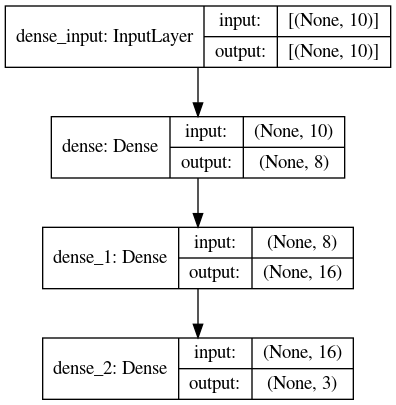

In [32]:
# Plot a design of the model
plot_model(model, show_shapes=True)

We can analyse the accuracy and loss of the network.

,loss,accuracy
0,0.973864,0.540219
1,0.951542,0.562689
2,0.948812,0.561367
3,0.940625,0.567787
4,0.953542,0.566276
5,0.941242,0.568731
6,0.959216,0.555891
7,0.956126,0.557779
8,0.941665,0.570242
9,0.953354,0.548905


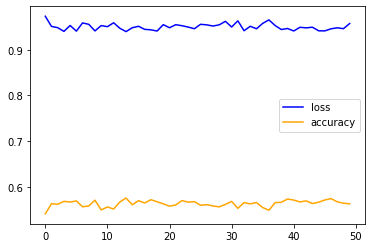

In [33]:
history_df = pd.DataFrame(history.history)
display(history_df)
ax = plt.subplot()
ax.plot(history_df.index, history_df['loss'], color = 'blue', label = 'loss')
ax.plot(history_df.index, history_df['accuracy'], color = 'orange', label = 'accuracy')
plt.legend()

Now let us evaluate the neural network model on the test dataset.

42/42 [==============================] - 0s 742us/step - loss: 0.9417 - accuracy: 0.5733
Accuracy on test dataset: 0.5732628107070923
[[0.51410633 0.3823735  0.6211566 ]
 [0.51410633 0.3823735  0.6211566 ]
 [0.51410633 0.3823735  0.6211566 ]
 ...
 [0.4699136  0.57661074 0.3723622 ]
 [0.51410633 0.3823735  0.6211566 ]
 [0.51410633 0.3823735  0.6211566 ]]


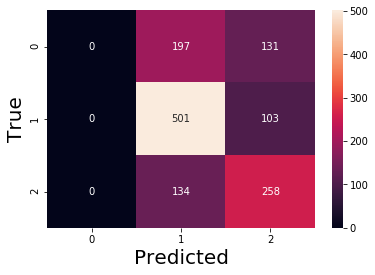

In [34]:
# Evaluate accuracy
test_loss, test_accuracy = model.evaluate(x = X_test, y = y_test)
print('Accuracy on test dataset:', test_accuracy)       

# Make predictions
y_pred = model.predict(X_test) 

# From each row take index with the biggest value
y_pred_labels = tf.argmax(y_pred, axis=1)
print(y_pred)

# Confusion matrix
CM = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_labels, num_classes = 3)
ax = plt.subplot()
sns.heatmap(CM, annot = True, fmt = 'g')
ax.set_xlabel('Predicted', fontsize = 20)
ax.set_ylabel('True', fontsize = 20)
plt.show()

Again we can observe that there is a problem with predicting the '0' class. 

From the four algorithms presented above we can conclude that Gradient Boost is the most accurate one, however, the fact that only one feature is extremely dominant is disturbing. Each model has its advantages and disadvantages. With limited time and computational resources I was able to achieve almost 60% of accuracy. Nonetheless, I must admit that there is still room for improvement.

## Final remarks

* During the feature selection phase I proposed a few methods in which I used some (arbitrary) thresholds. I also treated all of the dimensions equally. However, there are separated subgroups g1_, g2_ and c_. It might be worth checking if a selection of an equal number of columns from each of these subgroups would improve the results.
* When analysing the target I noticed that classes 0, 1 and 2 do not have the same size. Class 0 occupies 25.2% of the dataset, class 1 - 46.5% and class 2 - 28.4%. This may lead to an imbalanced classification, resulting in worse model performances. In the perfect situation size of each class should be the same. One idea (worth testing in the future) is to drop some rows in classes 1 and 2 to make their sizes the same as class 0. 
* There are much more algorithms to check and test. I decided to use the most common ones as they are well-documented and easy to understand. From these four tested techniques, Gradient Boosting Classifier has the best performance.
* I also performed a hyperparameter tuning to select the best parameters for each classifier. Nonetheless, due to limited time and computational resources, I massively cut possible ranges. I do not expect a huge improvement with other parameters, however, accuracy can be a bit better.
* Feature c_2 seems to be the most relevant in the presented analysis as it has a dominant influence in the classification using Ada Boost and Gradient Boost methods.
* The most profitable group is group 1 and I would recommend investing in this group (and especially investigating what is the relation between group 1 and parameter c_2).